# observations:
Majority of the crimes happend on Friday (45,091 reported incidents), followed by Saturday (44,734 reported incidents) and Wednesday (39,623reported incidents).

 The interesting thing is that the least amount of incidents were reported on Monday (38,019 reported incidents) and Sunday (38,503 incidents)

Amongest high crime categories, larceny and theft tend to occur on Friday and Saturday. On the other hand, the occurrences of assault steadily increased on Friday and Saturday.

Larceny and theft forms about %39 of all incidents. And assault is a little bit shy to %13. 


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv("main-data.csv")

#reducing the number of categories to the top ten been chosen
categories = ['LARCENY/THEFT', 'ASSAULT', 'VANDALISM', 'WARRANTS', 'VEHICLE THEFT', 'SUSPICIOUS OCC', 'BURGLARY', 'DRUG/NARCOTIC', 'ROBBERY', 'FRAUD']
data= data[data.category.isin(categories)]

              

# Total Incidents Through the Week

In [5]:
#rearranging categories to have the number of descending from high to low and 
#choosing Friday as it has the hiest number 
categoriescrosstab = pd.crosstab(data['category'],data['day_w'])
categoriescrosstab.nlargest(10, 'Friday').head(10)

day_w,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
category,,,,,,,
LARCENY/THEFT,45091,38019,44734,39323,39799,38503,39623
ASSAULT,14882,13973,16075,16235,13454,13625,13765
VANDALISM,9864,8426,10097,9452,8371,8321,8426
VEHICLE THEFT,7762,6611,7284,6834,6762,6640,6758
BURGLARY,7600,6521,6103,5561,6697,6652,6785
WARRANTS,7214,6953,6478,6230,7635,7570,8493
SUSPICIOUS OCC,7018,6607,6211,6205,6714,6656,6876
DRUG/NARCOTIC,6530,6212,5733,5383,7346,7198,8114
ROBBERY,4092,4063,4386,4337,3872,3916,3977


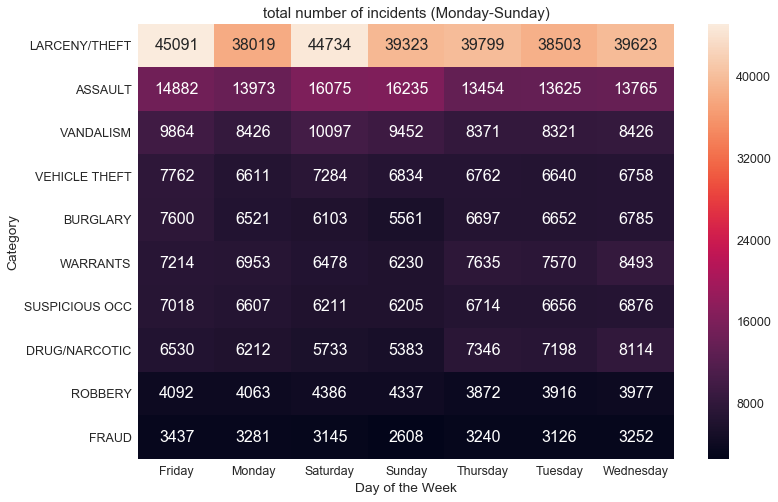

In [6]:
#Plotting category correlation to day of the week using seaborn crosstab
categoriescrosstab = pd.crosstab(data['category'],data['day_w'])


sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(12,8))
ax.invert_yaxis()
sns.set_context(font_scale=20)
sns.heatmap(categoriescrosstab.nlargest(10, 'Friday').head(10),annot=True,fmt='d',ax=ax,annot_kws={'size':16})

ax.set_title('total number of incidents (Monday-Sunday)')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Category')
plt.show()

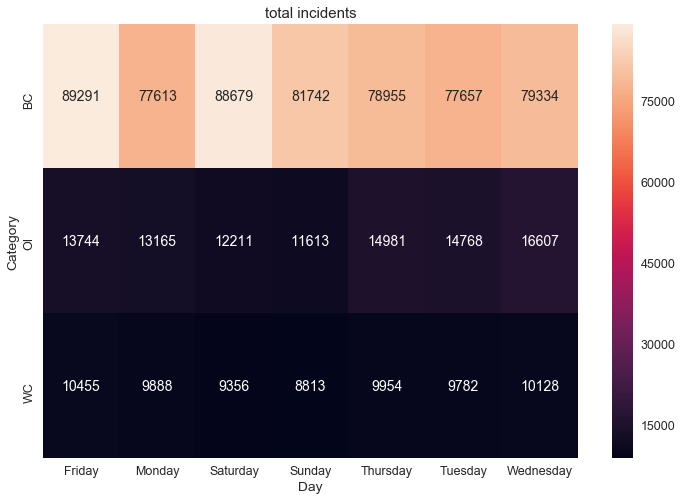

In [7]:
#Plotting meta_category correlation to day of the week using seaborn crosstab
categoriescrosstab = pd.crosstab(data['meta_cat'],data['day_w'])

sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(12,8))
ax.invert_yaxis()
sns.set_context(font_scale=20)
sns.heatmap(categoriescrosstab,annot=True,fmt='d',ax=ax,annot_kws={'size':14})

ax.set_title('total incidents')
ax.set_xlabel('Day')
ax.set_ylabel('Category')
plt.show()

# Total Incidents day by day

# Monday

In [8]:
#Creating DataFrame that contains ONLY Monday and call it Monday_df
monday_df = pd.DataFrame(data.loc[data["day_w"] == "Monday", :])
monday_df['category'].value_counts()

LARCENY/THEFT     38019
ASSAULT           13973
VANDALISM          8426
WARRANTS           6953
VEHICLE THEFT      6611
SUSPICIOUS OCC     6607
BURGLARY           6521
DRUG/NARCOTIC      6212
ROBBERY            4063
FRAUD              3281
Name: category, dtype: int64

In [9]:
category_data_monday = monday_df['category'].value_counts()

#Get total of incidents 
monday_total_incidents = category_data_monday.add(category_data_monday, fill_value=0)
monday_total_incidents

LARCENY/THEFT     76038
ASSAULT           27946
VANDALISM         16852
WARRANTS          13906
VEHICLE THEFT     13222
SUSPICIOUS OCC    13214
BURGLARY          13042
DRUG/NARCOTIC     12424
ROBBERY            8126
FRAUD              6562
Name: category, dtype: int64

In [10]:
#calculating the sum of all incidents 
monday_sum = monday_total_incidents.sum()

#calculating the percentage
monday_percentage = monday_total_incidents/monday_sum * 100
monday_percentage

LARCENY/THEFT     37.767469
ASSAULT           13.880556
VANDALISM          8.370254
WARRANTS           6.906999
VEHICLE THEFT      6.567262
SUSPICIOUS OCC     6.563288
BURGLARY           6.477857
DRUG/NARCOTIC      6.170902
ROBBERY            4.036119
FRAUD              3.259293
Name: category, dtype: float64

In [44]:
# Configure plot and ticks
monday_percentage.plot(kind="pie",
                figsize=(19,9),
                explode=explode,
                shadow=True, 
               autopct="{0:1.1f}%".format,
               startangle=45)

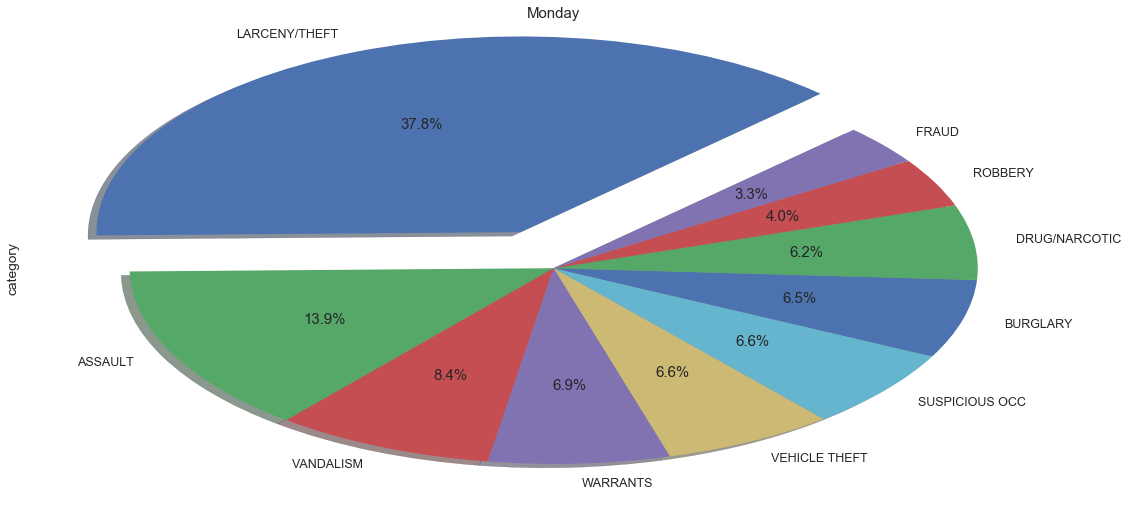

In [45]:
# Set textual properties
plt.title("Monday")
explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
plt.show()

# Tuesday

In [13]:
#Creating DataFrame that contains ONLY Monday and call it Tuesday_df
tuesday_df = pd.DataFrame(data.loc[data["day_w"] == "Tuesday", :])
tuesday_df['category'].value_counts()

LARCENY/THEFT     38503
ASSAULT           13625
VANDALISM          8321
WARRANTS           7570
DRUG/NARCOTIC      7198
SUSPICIOUS OCC     6656
BURGLARY           6652
VEHICLE THEFT      6640
ROBBERY            3916
FRAUD              3126
Name: category, dtype: int64

In [14]:
category_data_tuesday = tuesday_df['category'].value_counts()

#Get total of incidents 
tuesday_total_incidents = category_data_tuesday.add(category_data_tuesday, fill_value=0)
tuesday_total_incidents.head()

LARCENY/THEFT    77006
ASSAULT          27250
VANDALISM        16642
WARRANTS         15140
DRUG/NARCOTIC    14396
Name: category, dtype: int64

In [15]:
#calculating the sum of all incidents 
tuesday_sum = tuesday_total_incidents.sum()

#calculating the percentage
tuesday_percentage = tuesday_total_incidents/tuesday_sum * 100
tuesday_percentage

LARCENY/THEFT     37.671588
ASSAULT           13.330789
VANDALISM          8.141321
WARRANTS           7.406538
DRUG/NARCOTIC      7.042570
SUSPICIOUS OCC     6.512274
BURGLARY           6.508360
VEHICLE THEFT      6.496620
ROBBERY            3.831440
FRAUD              3.058499
Name: category, dtype: float64

In [16]:
# Configure plot and ticks
tuesday_percentage.plot(kind="pie",
                figsize=(19,9),
                explode=explode,
                shadow=True, 
               autopct="{0:1.1f}%".format,
                startangle=45)

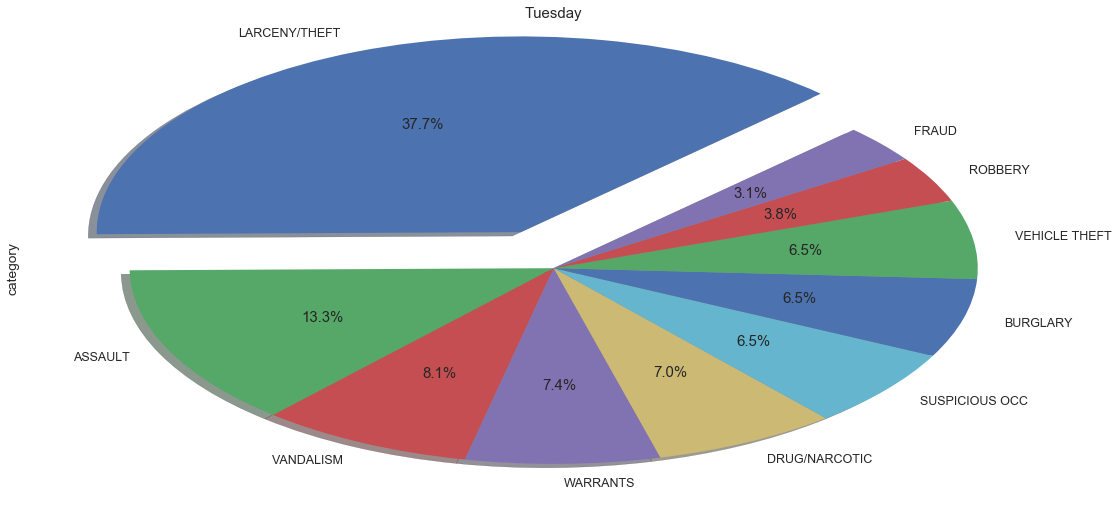

In [17]:
# Set textual properties
plt.title("Tuesday")
explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
plt.show()

# Wednesday

In [18]:
#Creating DataFrame that contains ONLY Monday and call it Wednesday_df
wednesday_df = pd.DataFrame(data.loc[data["day_w"] == "Wednesday", :])
wednesday_df['category'].value_counts()

LARCENY/THEFT     39623
ASSAULT           13765
WARRANTS           8493
VANDALISM          8426
DRUG/NARCOTIC      8114
SUSPICIOUS OCC     6876
BURGLARY           6785
VEHICLE THEFT      6758
ROBBERY            3977
FRAUD              3252
Name: category, dtype: int64

In [19]:
category_data_wednesday = wednesday_df['category'].value_counts()

#Get total of incidents 
wednesday_total_incidents = category_data_wednesday.add(category_data_wednesday, fill_value=0)
wednesday_total_incidents.head()

LARCENY/THEFT    79246
ASSAULT          27530
WARRANTS         16986
VANDALISM        16852
DRUG/NARCOTIC    16228
Name: category, dtype: int64

In [20]:
#calculating the sum of all incidents 
wednesday_sum = wednesday_total_incidents.sum()

#calculating the percentage
wednesday_percentage = wednesday_total_incidents/wednesday_sum * 100
wednesday_percentage

LARCENY/THEFT     37.355872
ASSAULT           12.977402
WARRANTS           8.007052
VANDALISM          7.943886
DRUG/NARCOTIC      7.649737
SUSPICIOUS OCC     6.482573
BURGLARY           6.396779
VEHICLE THEFT      6.371324
ROBBERY            3.749446
FRAUD              3.065929
Name: category, dtype: float64

In [21]:
# Configure plot and ticks
wednesday_percentage.plot(kind="pie",
                figsize=(19,9),
                explode=explode,
                shadow=True, 
               autopct="{0:1.1f}%".format,
                startangle=45)

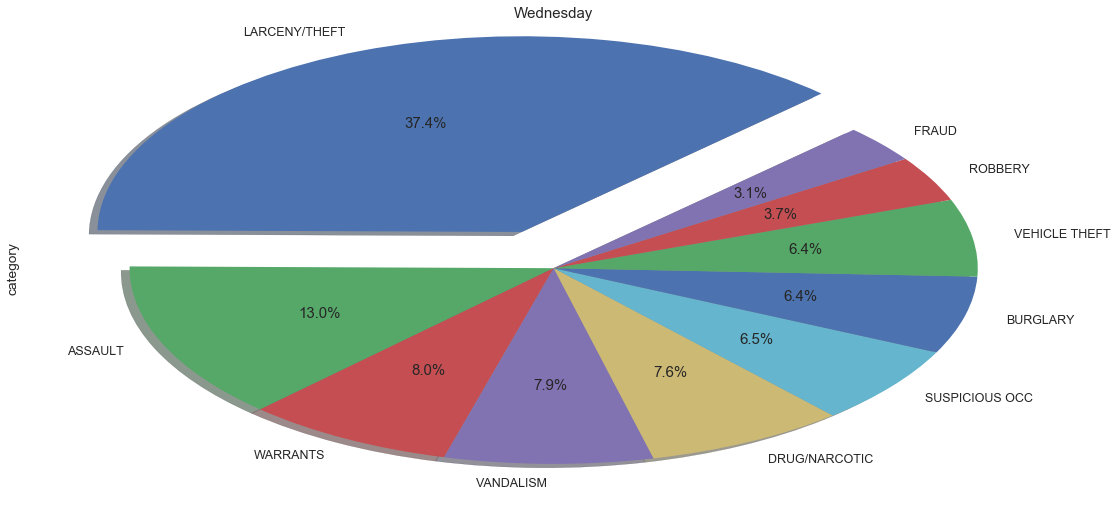

In [22]:
# Set textual properties
plt.title("Wednesday")
explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
plt.show()

# Thursday

In [23]:
#Creating DataFrame that contains ONLY Monday and call it Thursday_df
thursday_df = pd.DataFrame(data.loc[data["day_w"] == "Thursday", :])
thursday_df['category'].value_counts()

LARCENY/THEFT     39799
ASSAULT           13454
VANDALISM          8371
WARRANTS           7635
DRUG/NARCOTIC      7346
VEHICLE THEFT      6762
SUSPICIOUS OCC     6714
BURGLARY           6697
ROBBERY            3872
FRAUD              3240
Name: category, dtype: int64

In [24]:
category_data_thursday = thursday_df['category'].value_counts()

#Get total of incidents 
thursday_total_incidents = category_data_thursday.add(category_data_thursday, fill_value=0)
thursday_total_incidents.head()

LARCENY/THEFT    79598
ASSAULT          26908
VANDALISM        16742
WARRANTS         15270
DRUG/NARCOTIC    14692
Name: category, dtype: int64

In [25]:
#calculating the sum of all incidents 
thursday_sum = thursday_total_incidents.sum()

#calculating the percentage
thursday_percentage = thursday_total_incidents/thursday_sum * 100
thursday_percentage

LARCENY/THEFT     38.308788
ASSAULT           12.950236
VANDALISM          8.057561
WARRANTS           7.349119
DRUG/NARCOTIC      7.070940
VEHICLE THEFT      6.508807
SUSPICIOUS OCC     6.462605
BURGLARY           6.446241
ROBBERY            3.727019
FRAUD              3.118683
Name: category, dtype: float64

In [26]:
# Configure plot and ticks
thursday_percentage.plot(kind="pie",
                figsize=(19,9),
                explode=explode,
                shadow=True, 
               autopct="{0:1.1f}%".format,
                startangle=45)

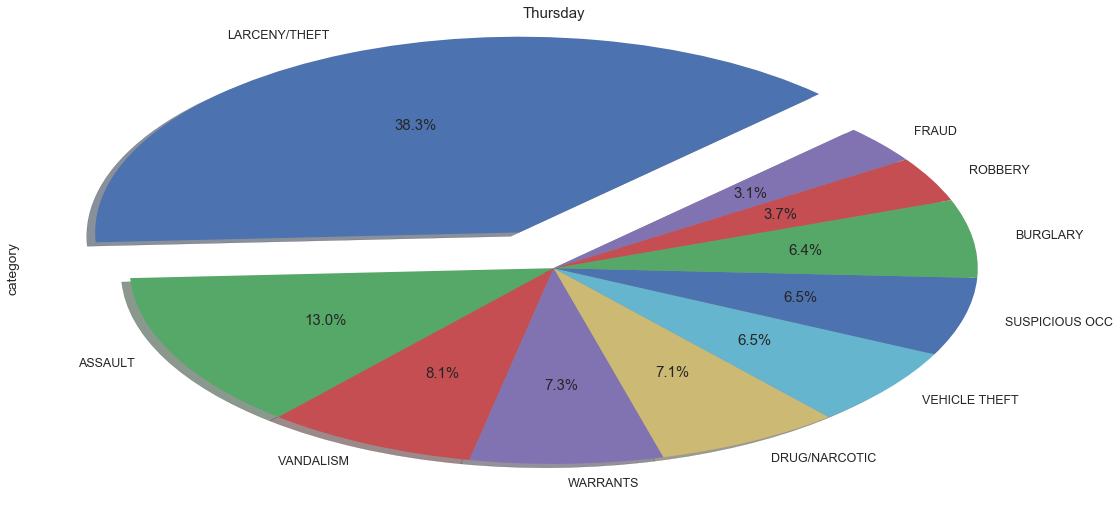

In [27]:
# Set textual properties
plt.title("Thursday")
explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
plt.show()

# Friday

In [28]:
#Creating DataFrame that contains ONLY Monday and call it Friday_df
friday_df = pd.DataFrame(data.loc[data["day_w"] == "Friday", :])
friday_df['category'].value_counts()

LARCENY/THEFT     45091
ASSAULT           14882
VANDALISM          9864
VEHICLE THEFT      7762
BURGLARY           7600
WARRANTS           7214
SUSPICIOUS OCC     7018
DRUG/NARCOTIC      6530
ROBBERY            4092
FRAUD              3437
Name: category, dtype: int64

In [29]:
category_data_friday = friday_df['category'].value_counts()

#Get total of incidents 
friday_total_incidents = category_data_friday.add(category_data_friday, fill_value=0)
friday_total_incidents.head()

LARCENY/THEFT    90182
ASSAULT          29764
VANDALISM        19728
VEHICLE THEFT    15524
BURGLARY         15200
Name: category, dtype: int64

In [30]:
#calculating the sum of all incidents 
friday_sum = friday_total_incidents.sum()

#calculating the percentage
friday_percentage = friday_total_incidents/friday_sum * 100
friday_percentage

LARCENY/THEFT     39.731254
ASSAULT           13.113050
VANDALISM          8.691515
VEHICLE THEFT      6.839369
BURGLARY           6.696625
WARRANTS           6.356507
SUSPICIOUS OCC     6.183805
DRUG/NARCOTIC      5.753811
ROBBERY            3.605604
FRAUD              3.028461
Name: category, dtype: float64

In [31]:
# Configure plot and ticks
friday_percentage.plot(kind="pie",
                figsize=(19,9),
                explode=explode,
                shadow=True, 
               autopct="{0:1.1f}%".format,
               startangle=45,
                )

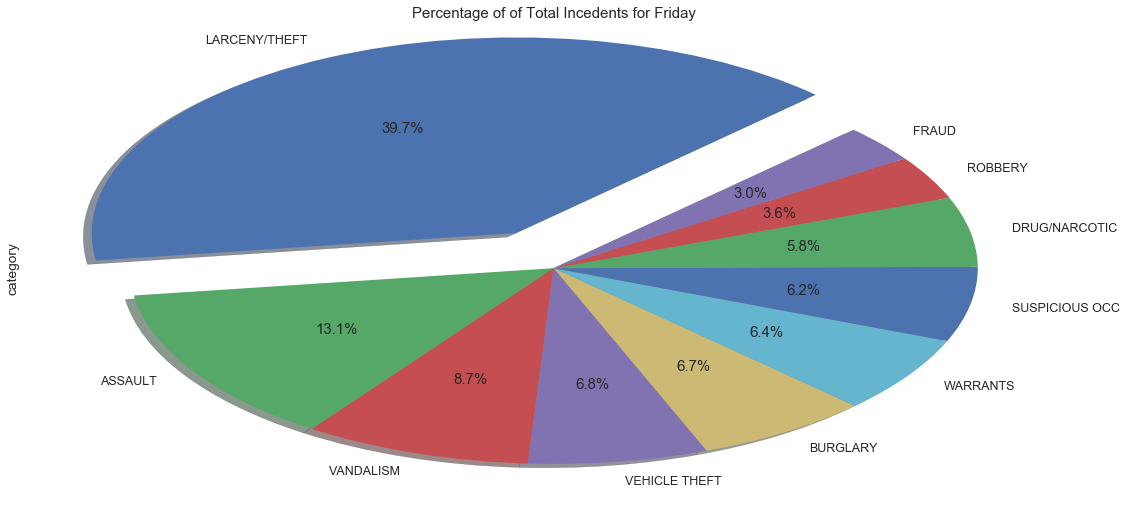

In [32]:
# Set textual properties
plt.title("Percentage of of Total Incedents for Friday")
explode = [0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0] 
plt.show()

# Saturday

In [33]:
#Creating DataFrame that contains ONLY Monday and call it Saturday_df
saturday_df = pd.DataFrame(data.loc[data["day_w"] == "Saturday", :])
saturday_df['category'].value_counts()

LARCENY/THEFT     44734
ASSAULT           16075
VANDALISM         10097
VEHICLE THEFT      7284
WARRANTS           6478
SUSPICIOUS OCC     6211
BURGLARY           6103
DRUG/NARCOTIC      5733
ROBBERY            4386
FRAUD              3145
Name: category, dtype: int64

In [34]:
category_data_saturday = saturday_df['category'].value_counts()

#Get total of incidents 
saturday_total_incidents = category_data_saturday.add(category_data_saturday, fill_value=0)
saturday_total_incidents.head()

LARCENY/THEFT    89468
ASSAULT          32150
VANDALISM        20194
VEHICLE THEFT    14568
WARRANTS         12956
Name: category, dtype: int64

In [35]:
#calculating the sum of all incidents 
saturday_sum = saturday_total_incidents.sum()

#calculating the percentage
saturday_percentage = saturday_total_incidents/saturday_sum * 100
saturday_percentage

LARCENY/THEFT     40.576529
ASSAULT           14.581028
VANDALISM          9.158609
VEHICLE THEFT      6.607042
WARRANTS           5.875950
SUSPICIOUS OCC     5.633764
BURGLARY           5.535802
DRUG/NARCOTIC      5.200189
ROBBERY            3.978376
FRAUD              2.852711
Name: category, dtype: float64

In [36]:
# Configure plot and ticks
saturday_total_incidents.plot(kind="pie",
                figsize=(19,9),
                explode=explode,
                shadow=True, 
               autopct="{0:1.1f}%".format,
               startangle=45)

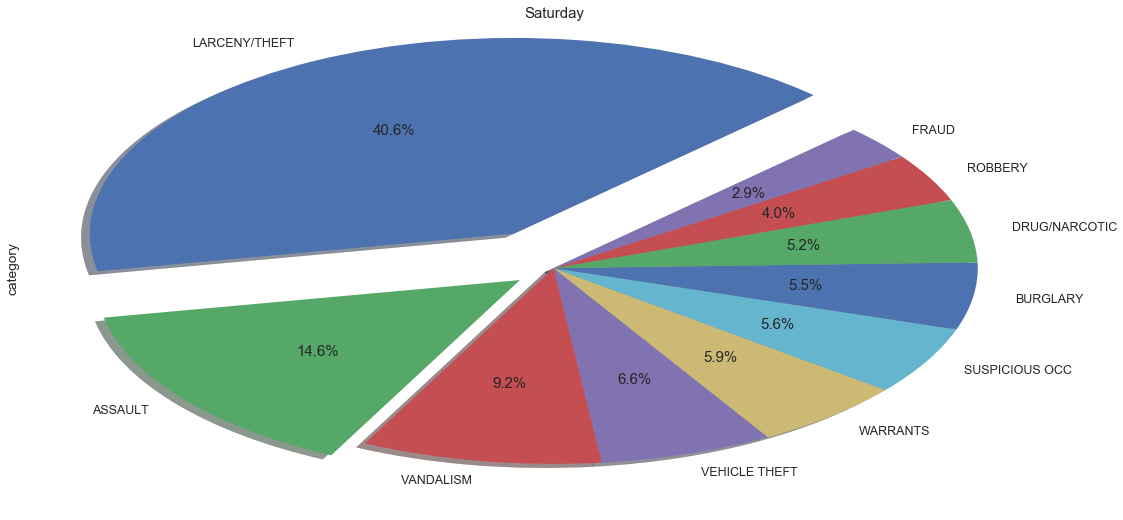

In [37]:
# Set textual properties
plt.title("Saturday")
explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
plt.show()

# Sunday

In [38]:
#Creating DataFrame that contains ONLY Monday and call it Sunday_df
sunday_df = pd.DataFrame(data.loc[data["day_w"] == "Sunday", :])
sunday_df['category'].value_counts()

LARCENY/THEFT     39323
ASSAULT           16235
VANDALISM          9452
VEHICLE THEFT      6834
WARRANTS           6230
SUSPICIOUS OCC     6205
BURGLARY           5561
DRUG/NARCOTIC      5383
ROBBERY            4337
FRAUD              2608
Name: category, dtype: int64

In [39]:
category_data_sunday = sunday_df['category'].value_counts()

#Get total of incidents 
sunday_total_incidents = category_data_sunday.add(category_data_sunday, fill_value=0)
sunday_total_incidents

LARCENY/THEFT     78646
ASSAULT           32470
VANDALISM         18904
VEHICLE THEFT     13668
WARRANTS          12460
SUSPICIOUS OCC    12410
BURGLARY          11122
DRUG/NARCOTIC     10766
ROBBERY            8674
FRAUD              5216
Name: category, dtype: int64

In [40]:
#calculating the sum of all incidents 
sunday_sum = sunday_total_incidents.sum()

#calculating the percentage
sunday_percentage = sunday_total_incidents/sunday_sum * 100
sunday_percentage

LARCENY/THEFT     38.488568
ASSAULT           15.890494
VANDALISM          9.251429
VEHICLE THEFT      6.688983
WARRANTS           6.097800
SUSPICIOUS OCC     6.073330
BURGLARY           5.442996
DRUG/NARCOTIC      5.268773
ROBBERY            4.244969
FRAUD              2.552658
Name: category, dtype: float64

In [41]:
# Configure plot and ticks
sunday_percentage.plot(kind="pie",
                figsize=(19,9),
                explode=explode,
                shadow=True, 
               autopct="{0:1.1f}%".format,
                startangle=45)


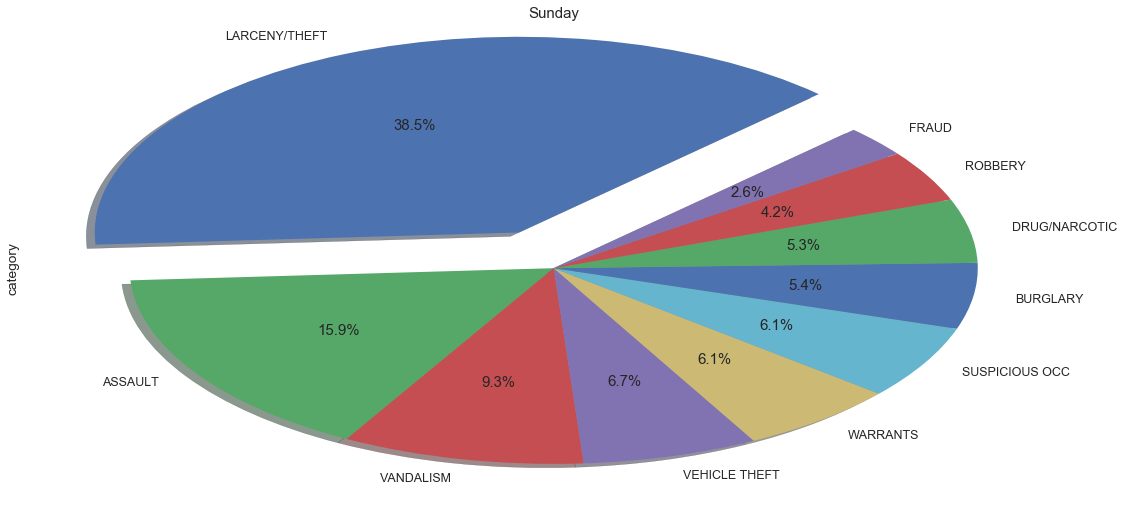

In [42]:
# Set textual properties
plt.title("Sunday")
explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
plt.show()